In [35]:
import getpass
import cordra
from lucenequerybuilder import Q
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
from urllib.error import HTTPError

# Cordra Host Information

In [2]:
host = "https://localhost:8443/"
credentials_file = "admin_cordra.json"

cordra.CordraClient.writeCredentialsFile(credentials_file, "admin", "admin")

localhost = cordra.CordraClient(host=host, credentials_file=credentials_file, verify=False)

In [3]:
localhost.schemas.keys()

dict_keys(['TabularDataPackage', 'ProcessHistory', 'SoftwareApplication', 'Material', 'InstrumentAction', 'Study', 'Collection', 'Project', 'DefinedTerm', 'Config', 'MaterialStructure', 'Form', 'Instrument', 'Experiment', 'User', 'Organization', 'Person', 'UnitOfMeasurement', 'Dataset', 'MaterialProperty', 'Document', 'SoftwareSourceCode', 'DefinedTermSet', 'DataFormat', 'TabularData', 'ProcessProtocol', 'File', 'DataCatalog', 'Comment', 'Citation', 'Place', 'Group', 'SoftwareApplication2', 'DutyAction', 'deleteThisMaterialSchema'])

In [4]:
obj_type = "Document"

# Create two similar objects

In [5]:
file_1 = "example-data.csv"
payloads = {'p1': (file_1, open(file_1,'rb'))}

obj_1 = dict()
obj_1["name"] = "example 1"
obj_1["description"] = "an example of metadata for CSV payload"
obj_1["author"] = "John"

my_acl = dict()
my_acl["readers"] = ["public"]

response = localhost.create(obj_1, obj_type, acls=my_acl, payloads=payloads)
response

{'id': 'test/d4dd7647ae00939156ec',
 'name': 'example 1',
 'description': 'an example of metadata for CSV payload',
 'author': 'John'}

In [6]:
file_2 = "example-data.csv"
payloads = {'p1': (file_2, open(file_2,'rb'))}

obj_2 = dict()
obj_2["name"] = "example 2"
obj_2["description"] = "another example of metadata for CSV payload"
obj_2["author"] = "Tim"

my_acl = dict()
my_acl["readers"] = ["public"]

response = localhost.create(obj_2, obj_type, acls=my_acl, payloads=payloads)
response

{'id': 'test/593c3fedbb06c9f61b91',
 'name': 'example 2',
 'description': 'another example of metadata for CSV payload',
 'author': 'Tim'}

# Query objects

## Full text query example

In [7]:
q = Q('metadata')
my_results = localhost.find(str(q))
my_results

{'pageNum': 0,
 'pageSize': -1,
 'size': 4,
 'results': [{'id': 'test/f1f0188d7e74ce2e9b39',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/d92d43a269b89a3e6a10',
   'name': 'example 2',
   'description': 'another example of metadata for CSV payload',
   'author': 'Tim'},
  {'id': 'test/d4dd7647ae00939156ec',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/593c3fedbb06c9f61b91',
   'name': 'example 2',
   'description': 'another example of metadata for CSV payload',
   'author': 'Tim'}]}

## Field query examples

In [8]:
q = Q('/author','John')
my_results = localhost.find(str(q))
obj_id_1 = my_results["results"][0]["id"]
my_results

{'pageNum': 0,
 'pageSize': -1,
 'size': 2,
 'results': [{'id': 'test/f1f0188d7e74ce2e9b39',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/d4dd7647ae00939156ec',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'}]}

In [9]:
q = Q('/author','Tim')
my_results = localhost.find(str(q))
obj_id_2 = my_results["results"][0]["id"]
my_results

{'pageNum': 0,
 'pageSize': -1,
 'size': 2,
 'results': [{'id': 'test/d92d43a269b89a3e6a10',
   'name': 'example 2',
   'description': 'another example of metadata for CSV payload',
   'author': 'Tim'},
  {'id': 'test/593c3fedbb06c9f61b91',
   'name': 'example 2',
   'description': 'another example of metadata for CSV payload',
   'author': 'Tim'}]}

# Read objects

In [10]:
obj_id_2

'test/d92d43a269b89a3e6a10'

In [11]:
my_obj = localhost.read(obj_id_2)
my_obj

{'id': 'test/d92d43a269b89a3e6a10',
 'name': 'example 2',
 'description': 'another example of metadata for CSV payload',
 'author': 'Tim'}

In [12]:
my_obj = localhost.read(obj_id_2,full=True)
my_obj

{'id': 'test/d92d43a269b89a3e6a10',
 'type': 'Document',
 'content': {'id': 'test/d92d43a269b89a3e6a10',
  'name': 'example 2',
  'description': 'another example of metadata for CSV payload',
  'author': 'Tim'},
 'acl': {'readers': ['public']},
 'metadata': {'createdOn': 1652300773878,
  'createdBy': 'admin',
  'modifiedOn': 1652300773878,
  'modifiedBy': 'admin',
  'txnId': 1652300773879426},
 'payloads': [{'name': 'p1', 'filename': 'example-data.csv', 'size': 385}]}

In [13]:
obj_payload_name = my_obj["payloads"][0]["name"]
obj_payload_name

'p1'

In [14]:
payload = localhost.read(obj_id_2, getAll=True)["payloads"][obj_payload_name]
payload.decode('utf-8')

'\ufeff"SAM0","SAM1"\r\n1.00,2.302389071\r\n2.00,3.71503899\r\n3.00,9.426125622\r\n4.00,11.34529125\r\n5.00,11.87704484\r\n6.00,19.01325695\r\n7.00,21.52353652\r\n8.00,28.28670056\r\n9.00,29.55737761\r\n10.00,25.89582707\r\n11.00,31.57982065\r\n12.00,36.02452105\r\n13.00,39.47686412\r\n14.00,44.41192202\r\n15.00,43.36098819\r\n16.00,48.61525381\r\n17.00,53.91222295\r\n18.00,54.28420278\r\n19.00,53.1378195\r\n20.00,55.88015939'

In [15]:
df = pd.read_csv(StringIO(payload.decode('utf-8')))
df

,SAM0,SAM1
0,1.0,2.302389
1,2.0,3.715039
2,3.0,9.426126
3,4.0,11.345291
4,5.0,11.877045
5,6.0,19.013257
6,7.0,21.523537
7,8.0,28.286701
8,9.0,29.557378
9,10.0,25.895827


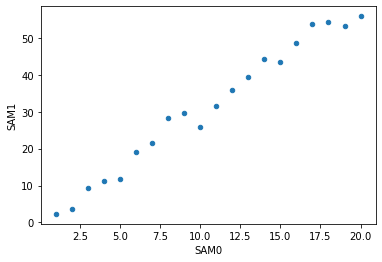

In [16]:
df.plot.scatter(x='SAM0', y='SAM1')
plt.show()

# Update Objects

This also demonstrates the use of "Dry Run". During a "Dry Run", Cordra not actually create/update the object. Cordra will return results as if object had been created/updated. 

## Update part of the object JSON

payloads not affected

In [17]:
response = localhost.update(
    "I really need to write a better description for my data.",
    obj_id_2,
    jsonPointer="/description",
    dryRun=True,
    full=True)
response

{'id': 'test/d92d43a269b89a3e6a10',
 'type': 'Document',
 'content': {'id': 'test/d92d43a269b89a3e6a10',
  'name': 'example 2',
  'description': 'I really need to write a better description for my data.',
  'author': 'Tim'},
 'acl': {'readers': ['public']},
 'metadata': {'createdOn': 1652300773878,
  'createdBy': 'admin',
  'modifiedOn': 1652302164967,
  'modifiedBy': 'admin',
  'txnId': 1652300773879426},
 'payloads': [{'name': 'p1', 'filename': 'example-data.csv', 'size': 385}]}

## Update all of the object JSON

payloads not affected

In [18]:
original = {'id': 'test/3b11b6a7bdb1d6cf052e', "SAM1":"Level of CXCR4 expression"}

response = localhost.update(
    original,
    obj_id_2,
    dryRun=True,
    full=True)

print(original)
print(response["content"])

assert original == response["content"]

{'id': 'test/3b11b6a7bdb1d6cf052e', 'SAM1': 'Level of CXCR4 expression'}
{'id': 'test/d92d43a269b89a3e6a10', 'SAM1': 'Level of CXCR4 expression'}


AssertionError: 

## Check ACLs

In [24]:
# Create new user
user1 = localhost.create({"@context": "", "@type": "", "username": "user1", "password": "person.1234"}, "User")
user1_id = user1["@id"]

user2 = localhost.create({"@context": "", "@type": "", "username": "user2", "password": "person.1234"}, "User")
user2_id = user2["@id"]

In [25]:
credentials_file = "user1_cordra.json"
cordra.CordraClient.writeCredentialsFile(credentials_file, "user1", "person.1234")

credentials_file = "user2_cordra.json"
cordra.CordraClient.writeCredentialsFile(credentials_file, "user2", "person.1234")

In [36]:
localhost = cordra.CordraClient(host=host, credentials_file="admin_cordra.json", verify=False)
r = localhost.create({"name": "unaccessible"}, obj_type, acls={"readers":[user1_id],"writers":None})
obj_id = r[0]['id']

print(r)
print(user1)
print(user2)

localhost_user1 = cordra.CordraClient(host=host, credentials_file="user1_cordra.json", verify=False)
localhost_user1.read(obj_id)

localhost_user2 = cordra.CordraClient(host=host, credentials_file="user2_cordra.json", verify=False)

# this should return a 403 error
try:
    localhost_user2.read(obj_id)
except Exception as e:
    print(e)

[{'id': 'test/e5204c2a08da1cea0e75', 'type': 'Document', 'content': {'id': 'test/e5204c2a08da1cea0e75', 'name': 'unaccessible'}, 'metadata': {'createdOn': 1652302544072, 'createdBy': 'admin', 'modifiedOn': 1652302544072, 'modifiedBy': 'admin', 'txnId': 1652302544072476}}, {'readers': ['test/df79bacf7e00425c8423']}]
{'@context': '', '@type': '', '@id': 'test/df79bacf7e00425c8423', 'username': 'user1', 'password': '', 'id': ''}
{'@context': '', '@type': '', '@id': 'test/edfdc00078a41b4d8557', 'username': 'user2', 'password': '', 'id': ''}

403 Client Error: Forbidden for url: https://localhost:8443/objects/test/e5204c2a08da1cea0e75?full=False


## Update ACLs

In [38]:
r = localhost.update(dict(), obj_id, acls={"readers":[user2_id],"writers":None})

localhost_user2.read(obj_id)

# this should return a 403 error
try:
    localhost_user1.read(obj_id)
except Exception as e: 
    print(e)

updating ACLs

403 Client Error: Forbidden for url: https://localhost:8443/objects/test/e5204c2a08da1cea0e75?full=False


In [46]:
# Update payloads and acls at the same time
r = localhost.update({"@id": obj_id}, obj_id, payloads={"file":"update".encode('utf-8')}, acls={"readers":[user1_id],"writers":None})

localhost_user1.read(obj_id)

# this should return a 403 error
try:
    localhost_user2.read(obj_id)
except Exception as e:
    print(e)


403 Client Error: Forbidden for url: https://localhost:8443/objects/test/e5204c2a08da1cea0e75?full=False


# Delete objects

In [22]:
all_objects = []

r = localhost.find("*", pageSize=-1, full=True)

all_objects += [ri['id'] for ri in r['results'] if ri['type']!='Schema']
    
print(len(all_objects))

15


In [23]:
for obj_id in all_objects:
    localhost.delete(obj_id)

# Delete Token

In [ ]:
r =  localhost.delete_auth()
r